<a href="https://colab.research.google.com/github/2Eunjin2/jejumaster/blob/main/3%EC%9D%BC%EC%B0%A8_%EC%9B%B9%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_01_%EC%BD%94%EB%9E%A9_OpenAPI%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹 데이터 분석

## 1. OpenAPI를 이용한 데이터 수집

**[주의!] (코랩)한글 폰트 지정하는 방법**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

### 한글 폰트 지정하기

In [ ]:
import matplotlib.pyplot as plt
#(Mac한글 폰트 지정하기)
plt.rcParams['font.family'] = 'NanumBarunGothic'

#(windows)한글 폰트 지정하기
# plt.rcParams['font.family'] = 'Malgun Gothic'

---

### 01.웹 크롤링의 이해
- **웹 크롤링(Web Crawling)**: 웹 페이지로부터 원하는 정보를 추출하는 기법, 보통 여러 페이지 탐색하는 방법,
- **웹 스크래핑(Web Scraping)**: 특정한 하나의 웹 페이지를 탐색하는 방법
- **웹 크롤링과 웹 스크래핑의  방법이 동일하여 보통 웹 크롤링이라고 통칭해서 부른다.**

In [ ]:
# 웹 요청 동작 원리

import requests

requests.get("https://google.com")
# 정상적으로 실행이 되면 코드 200으로 응답(Response)이 옴

<Response [200]>

In [ ]:
import requests

response = requests.get("https://google.com")

# 응답 상태
print('#응답 상태: ', response.status_code)

# 응답 바이너리 원문
print('#응답 바이너리 원문: ', response.content)

# 응답 UTF-8로 인코딩된 문자열
print('#응답 UTF-8로 인코딩된 문자열: ', response.text)

# 응답 헤더
print('#응답 헤더: ', response.headers)

# 응답 헤더: 콘텐트 유형
print('#응답 헤더유형: ', response.headers['Content-Type'])

---------------------

## 02.네이버 OpenAPI 사용하기

### # 1.네이버 OpenAPI 신청하기 : 네이버 **검색(책, 뉴스, 쇼핑)

- 네이버 OpenAPI 소개: https://developers.naver.com/products/intro/plan/
- 개발 가이드 보기: https://developers.naver.com/docs/serviceapi/search/news
- OpenAPI 신청하기: https://developers.naver.com/apps/#/register

### # 2.네이버 OpenAPI 사용 예 : 책 검색

In [ ]:
import urllib.request
import json
# 네이버 애플리케이션 등록 정보
client_id = 'UsdGguZ1D1Y_P7imA1Wf'  # 자신의 client_id
client_pw = 'w63ZwbYLou'            # 자신의 client_secret

# 검색어 입력
title = input("검색 도서명: ")
# url설정
url = "https://openapi.naver.com/v1/search/book.json"
query = "?query="+urllib.parse.quote(title)
option = "&display=10&start=1" # 10개씩&가져올 페이지 지정
url_query = url + query + option
print(f'url_query = {url_query}')

#Open API 검색 요청 개체 설정
request = urllib.request.Request(url_query)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_pw)

# 검색 요청 및 처리
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode == 200):
    result = response.read().decode('utf-8')
else:
    print("검색에 실패하였습니다.")
    exit()
# 검색 결과 parsing 해서 보기좋게 출력하기
books = json.loads(result) #검색 결과를 json타입으로 보여주기
if books == None:
    print("json.loads 실패하였습니다.")
    exit()

# books 결과 중 도서 정보가 담긴 items 항목의 내용을 parsing한다.
for book in books['items']:
    print(f"제목: {book['title']}")
    print(f"저자: {book['author']}")
    print(f"URL: {book['link']}")
    print()

### [실습] : 네이버 검색 API 사용하여 데이터 수집하기

#### 라이브러리 설치하기

In [ ]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = 'UsdGguZ1D1Y_P7imA1Wf'  # 자신의 client_id
client_pw = 'w63ZwbYLou'            # 자신의 client_secret
PATH = './sample_data'              # 수집 데이터 저장 폴더


#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):
    if node == 'book':
        data = {'제목':post['title'],
                '저자':post['author'],
                '출판사':post['publisher'],
                '출간일':post['pubdate'],
                '링크':post['link'],
                '이미지':post['image']}
    elif node == 'news':
        data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}
    elif node == 'shop':
        data = {'제목':post['title'],
                '브랜드':post['brand'],
                '제조사':post['maker'],
                '가격':post['lprice'],
                '이미지':post['image']}

    jsonResult.append(data)
    datas.append(data)

    return

#[CODE 0]
def main():
    global node, srcText

    nodeType = '''-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------'''
    print(nodeType)
    node = input('번호를 선택하세요.')
    if node == '1': node = 'book'
    elif node == '2': node = 'news'
    elif node == '3': node = 'shop'

    srcText = input(f'{node} 분류에서 검색할 검색어를 입력하세요: ')

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, srcText, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, srcText, start, total)
#     print(f'가져올 데이터 : {total} 건')

    with open(f'{PATH}/naver_{node}_{srcText}.txt', 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))



    # csv 파일로 저장하기
    file = f'{PATH}/naver_{node}_{srcText}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'{PATH}/naver_{node}_{srcText}.csv SAVED')
    return df

#-----------
# 시작
#-----------
df = main()
df

-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------
번호를 선택하세요.3
shop 분류에서 검색할 검색어를 입력하세요: 어그부츠
[2023년11월01일 03시00분04초] Url Request Success
HTTP Error 400: Bad Request
[2023년11월01일 03시00분04초] Error for URL : https://openapi.naver.com/v1/search/shop.json?query=%EC%96%B4%EA%B7%B8%EB%B6%80%EC%B8%A0&start=101&display=358437
가져온 데이터 : 100 건
./sample_data/naver_shop_어그부츠.csv SAVED


,제목,브랜드,제조사,가격,이미지
0,<b>어그부츠</b> 울트라 클래식 미니 호주 DK 오즈웨어 숏부츠 플랫폼,어그,,47000,https://shopping-phinf.pstatic.net/main_104625...
1,호주 <b>어그 부츠</b> 울트라미니 플랫폼 양털 키높이 <b>어그부츠</b> A...,어그,어그,57430,https://shopping-phinf.pstatic.net/main_864648...
2,<b>어그</b> W 클래식 울트라 미니 플랫폼 체스트넛 1135092-CHE,어그,어그,121000,https://shopping-phinf.pstatic.net/main_429385...
3,<b>어그</b> 23FW 호주 오즈웨어 클래식 울트라 미니 방수 <b>부츠</b...,어그,어그,36950,https://shopping-phinf.pstatic.net/main_418506...
4,겨울 방수 클래식 숏 <b>어그부츠</b> 4컬러,어그,어그,56000,https://shopping-phinf.pstatic.net/main_822365...
...,...,...,...,...,...
95,아기베베유아 토리털 <b>어그부츠</b>,,,14500,https://shopping-phinf.pstatic.net/main_847302...
96,호주<b>어그 부츠</b> 오즈웨어 미니 클래식 스웨이드 OB664,오즈웨어,오즈웨어,34560,https://shopping-phinf.pstatic.net/main_345955...
97,<b>UGG</b> 호주 오즈웨어 <b>어그</b> 클래식 미니 양털<b>부츠</b...,오즈웨어,,38520,https://shopping-phinf.pstatic.net/main_418839...
98,(쿠폰)제이키치 하이<b>어그부츠</b>,,,182000,https://shopping-phinf.pstatic.net/main_854027...




---



### [실습] :  네이버 Papago API 사용하여 번역하기

In [ ]:
import os
import sys
import urllib.request
import datetime
import json


# client_id = ''  # 자신의 파파고 NMT API ID
# client_pw = ''            # 자신의 파파고 NMT API PASSWORD

news = []   #csv파일을 위한 변수

#[CODE 1]
def papago(prompt, lang=1):

    encText = urllib.parse.quote(prompt)
    if lang == 1 :
        data = "source=ko&target=en&text=" + encText
    else:
        data = "source=en&target=ko&text=" + encText
    url = "https://openapi.naver.com/v1/papago/n2mt"

    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req, data=data.encode("utf-8") )
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            responseDecode = response.read().decode('utf-8')

            if responseDecode == None:
                return None
            else:
                return json.loads(responseDecode)

    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

# 메인
lang= int(input('[선택] 1:한글->영어, 2:영어->한글: '))
txt =  '한글' if lang==1 else '영어'
prompt= input(f'[번역] 변환할 문장을 입력하세요.[{txt}로 입력]: ')

jsonResponse = papago(prompt, lang)  # 파파고 번역
jsonResponse
print('-'*50)
print(f"[번역 결과] => {jsonResponse['message']['result']['translatedText']}")


[선택] 1:한글->베트남어, 2:영어->한글: 1
[번역] 변환할 문장을 입력하세요.[한글로 입력]: 안녕하세요
[2023년11월01일 01시54분45초] Url Request Success
--------------------------------------------------
[번역 결과] => Xin chào.


-------------------------

### 한글 텍스트 Cleansing

#### 라이브러리 설치

In [ ]:
# 자연어처리 형태소 분석 및 토큰화
!pip install nltk

In [ ]:
# (한글)자연어처리 형태소 분석 및 토큰화
# (WinOS에서는 konlpy를 사용하기 위해 JDK를 설치해야 오류가 없어 코랩에서 실행함)
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 39.1 MB/s eta 0:00:00


In [ ]:
# html tag parsing을 위한 라이브러리
!pip install beautifulsoup4

#### 한글 테스트 자연어 처리(Text Cleansing)

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import konlpy
import nltk

def clean_korean_documents(documents):
    #텍스트 정제 (HTML 태그 제거)
    for i, document in enumerate(documents):
        document = BeautifulSoup(document, 'html.parser').text
        documents[i] = document

    #텍스트 정제 (특수기호 제거)
    for i, document in enumerate(documents):
        document = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', document) #특수기호 제거, 정규 표현식
        documents[i] = document

    #텍스트 정제 (형태소 분석)
    for i, document in enumerate(documents):
        okt = konlpy.tag.Okt()
        clean_words = []
        for word in okt.pos(document, stem=True): #어간 추출
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
                clean_words.append(word[0])
        document = ' '.join(clean_words)
        documents[i] = document

    #텍스트 정제 (불용어 제거)
    df = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
    df[0] = df[0].apply(lambda x: x.strip())
    stopwords = df[0].to_numpy()
    nltk.download('punkt')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            if word not in stopwords: #불용어 제거
                clean_words.append(word)
        documents[i] = ' '.join(clean_words)

    return documents


def clean_target_feature(data):
    x_data = data.to_list()
    return clean_korean_documents(x_data)



# ---------------------
# 1.클린징할 파일 가져오기
file = f'{PATH}/naver_{node}_{srcText}.csv'
df = pd.read_csv(file)

# 2.클린징할 컬럼 선택해서 클린징하기
# (앞 OpenAPI검색에서 2.news 검색을 한 후 실행하기)
df['제목'] = clean_target_feature(df['제목'])  # 기사 제목
df['내용'] = clean_target_feature(df['내용'])  # 기사 내용

# 3.클린징 결과 csv 파일로 저장하기
file = f'{PATH}/naver_{node}_{srcText}_clean.csv'
df.to_csv(file, index=False, encoding="utf-8-sig")
print(f'{file} SAVED')

df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


./sample_data/naver_news_한국어 강사_clean.csv SAVED


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,제목,링크,내용
0,스타트업 단신 채널 코퍼레이션 아이크 진 엔젤 스윙 크다 랩 모우 테,https://platum.kr/archives/216198,쏘다 카인 들다 교육 강사 교육 센터 교재 인터넷 강의 없다 직원 스마트폰 단말기 ...
1,아리랑 한국어 교육 콘텐츠 케이 챗 첫방송,https://www.yna.co.kr/view/AKR2023110105050000...,실생활 바로 활용 하다 있다 초 한국어 표현 상황 구성 하다 분 짜다 콘텐츠 총 편...
2,베트남 작가 응웬 빈 프엉 추다 간,http://www.munhaknews.com/news/articleView.htm...,하노이 한국어 강사 다낭 외국어대 한국어 문화 학과 강사 서울대 교육 종합 연구원 ...
3,시대 교육 업 디지털교과서 해외 공교육 공략 사활 건,https://view.asiae.co.kr/article/2023103119474...,고려대 불어 불문 졸업 양 대표 길잡이 학원 설립 하다 국어 강사 활동 하다 비상교...
4,아프리카 한글 학교 협의 회 합동 교사 연수 개최,http://www.dongponews.net/news/articleView.htm...,자랑스럽다 대한민국 홍보 대사 김성 효 강사 교사 연습 김택수 강사 인공 지능 하다...
...,...,...,...
95,사건 통역 돕다 경찰관 국내 첫 고려인 경찰관 김 엘레나,https://www.khan.co.kr/national/national-gener...,한국 식당 아르바이트 비롯 하다 네일아트 가게 근무 영어 강사 해보다 없다 겉모습 ...
96,에듀윌 필기 체력 면접 가산 통합 관리 가능하다 소방 공무원 합,https://www.siminilbo.co.kr/news/newsview.php?...,또한 평생 패스 공채 구매 시 소방 공무원 가산 자격증 위 헤더 진 강사 지텔프 강...
97,다문화 장애 아동 품다 디싹 캠프 디지털 전문가 되다,https://www.hankyung.com/article/2023101878861,드론 교구 눈높이 띄우다 보라 강사 명의 아이 긴장 하다 드론 조종 레버 움직이다 ...
98,경희사이버대 일본 법인 문화 교류 회 안녕 한국어 학당 과 간담 회,http://www.enewstoday.co.kr/news/articleView.h...,학습자 효율 교육 제공 하다 있다 계기 되어다 좋다 전 하다 평 일본 법인 문화 교...


### 텍스트 빈도수로 워드 클라우드 만들기

- **사이킷런 CountVectorizer클래스 사용 : 단어 빈도수 추출**
- **단, 한글에서 불용어 처리 및 가중치 처리 등 자연어 텍스트 전처리에 필요한 여러 가지 방법은 여기서 다루지 않는다.**

#### 라이브러리 설치

In [ ]:
!pip install scikit-learn

#### 기사 제목을 토큰화 하고 빈도수 출력하기

[('한국어', 30), ('교육', 19), ('영어', 14), ('다문화', 13), ('개최', 13), ('대회', 12), ('경진', 10), ('의회', 9), ('청소년', 9), ('문화', 8)]


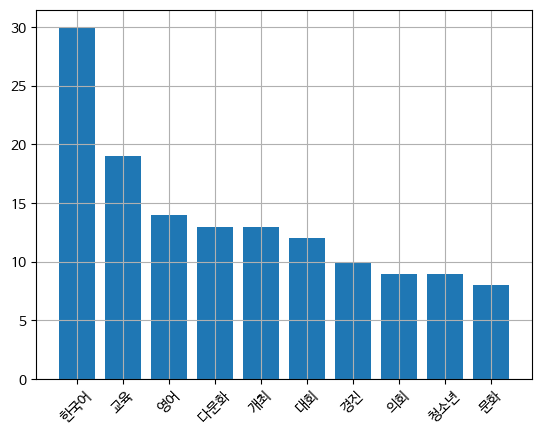

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 기사제목을 토큰화
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'{PATH}/{srcText}_bar_graph.png')


# 기사제목을 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(df['제목'].to_list())

# 단어(토큰) 빈도 수_Bar그래프 그리기 : 상위 10개
draw_wordTokenCountGraph(feature_name[:10], count[:10])

#### 워드 클라우드로 만들기

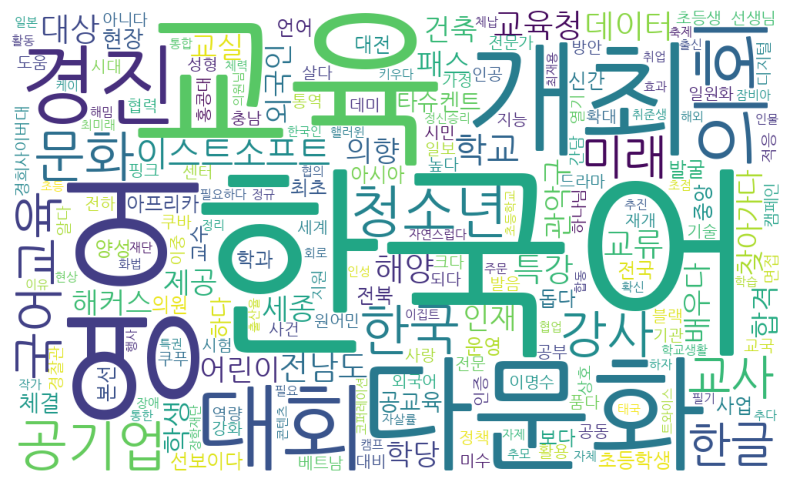

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 한글 폰트 경로를 설정
font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  (#코랩)
# font_path = 'malgun'  # C:/Windows/Fonts/   #(window에서)
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(feature_name, count))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file(f'{PATH}/{srcText}_워드클라우드.png')



---



## 03.웹 이미지 수집하기

### # 1. 웹 이미지 화면에 출력하기

In [ ]:
from IPython.display import Image
Image(url='https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg')

### # 2.  웹 이미지 파일로 저장하기

In [ ]:
import requests
from io import BytesIO
from PIL import Image

# 다운받을 이미지 url
urls = [
    "https://shopping-phinf.pstatic.net/main_3815224/38152244716.20230516165404.jpg",
    "https://shopping-phinf.pstatic.net/main_3726611/37266116619.20230119071117.jpg"
]
# 파일로 저장하기
for idx, url in enumerate(urls):
    res = requests.get(url)                   # url 요청
    img = Image.open(BytesIO(res.content))    # 응답결과(res.content)바이트파일 이미지 파일로 오픈
    img.save(f'./testimg_{idx}.png', 'png')   # 'png'이미지로(만) 저장

### [실습] : 웹 이미지 수집하기
- 앞에서 저장한 쇼핑 목록에 있는 URL을 이용하여 이미지 저장하기

In [ ]:
# 이미지 다운로드 하기
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import time
import os

FILE = f'{PATH}/naver_shop_어그부츠.csv'  # 앞에서 자신이 검색한 쇼핑 파일
ImgFolder = f'{PATH}/download/'         # 다운받을 이미지 폴더
MAX = 10                                # 이미지 파일 다운로드 건수

def getImageUrl(file):
    print(f'읽은 파일명: {file}')
    df = pd.read_csv(file, encoding='utf-8') # 이미지가 있는 쇼핑 파일 불러오기
    return df['이미지'].to_list()

def createDirectory(directory): # 다운받을 이미지 폴더 만들기
    try:
        if not os.path.exists(directory):
            print(f'{directory} 폴더가 생성되었습니다.')
            os.makedirs(directory)
        print(f'이미지 폴더 위치 : {directory}')
    except OSError:
        print("Error: Failed to create the directory.")

def downloadImageFile(urls, imgfolder):
    start = time.time()             # 이미지 다운로드 속도 time check
    for idx, url in enumerate(urls):
        if idx == MAX:
            break  # MAX 건수만 처리하기
        res = requests.get(url)     # request.get 요청
#         print(f'[{idx+1:2>}][{time.time() - start}] : {url}')  # 이미지 다운로드 시간 체크
        print(f'[{idx+1:0>2}] : {url}')  # 이미지 다운로드 시간 체크
        img = Image.open(BytesIO(res.content))  #Img open
        img.save(f'{imgfolder}testimage_{idx}.png', 'png')
    return idx


urls = getImageUrl(FILE)                # 이미지 URL 목록 가져오기
createDirectory(ImgFolder)              # 다운받을 이미지 폴더 만들기
totalcnt = downloadImageFile(urls, ImgFolder)      # 이미지 다운로드하기
print(f'총 다운로드 건수: {totalcnt}')


읽은 파일명: ./sample_data/naver_shop_어그부츠.csv
./sample_data/download/ 폴더가 생성되었습니다.
이미지 폴더 위치 : ./sample_data/download/
[01] : https://shopping-phinf.pstatic.net/main_1046255/10462550162.10.jpg
[02] : https://shopping-phinf.pstatic.net/main_8646480/86464807294.jpg
[03] : https://shopping-phinf.pstatic.net/main_4293853/42938535385.20231027014016.jpg
[04] : https://shopping-phinf.pstatic.net/main_4185068/41850686508.20230929125035.jpg
[05] : https://shopping-phinf.pstatic.net/main_8223658/82236587379.1.jpg
[06] : https://shopping-phinf.pstatic.net/main_3467783/34677837174.20221111142617.jpg
[07] : https://shopping-phinf.pstatic.net/main_3490505/34905057082.6.jpg
[08] : https://shopping-phinf.pstatic.net/main_8509217/85092175030.2.jpg
[09] : https://shopping-phinf.pstatic.net/main_4283258/42832586126.20231101030127.jpg
[10] : https://shopping-phinf.pstatic.net/main_4304613/43046135434.20231027085134.jpg
총 다운로드 건수: 10


---------------------------

끝!